In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load features from CSV file
df = pd.read_csv("features_with_labels.csv")

# Extract features for clustering
X = df.drop(columns=["Image Number","Complexity"]).values

# Perform KMeans clustering
num_clusters = 5  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Compute silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)


C:\Users\bpadm\AppData\Local\Temp\ipykernel_31496\510062295.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Silhouette Score: 0.6081457398988577


In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score

# Load features from CSV file
df = pd.read_csv("features_with_labels.csv")

# Extract features for clustering
X = df.drop(columns=["Image Number", "Complexity"]).values

# Number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

silhouette_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    
    # Perform KMeans clustering on the training data
    num_clusters = 5  # You can choose the number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels_train = kmeans.fit_predict(X_train)
    
    # Compute silhouette score on the test data using cluster centers from training
    cluster_centers = kmeans.cluster_centers_
    cluster_labels_test = kmeans.predict(X_test)
    silhouette_avg = silhouette_score(X_test, cluster_labels_test)
    silhouette_scores.append(silhouette_avg)

# Compute average silhouette score across all folds
average_silhouette_score = np.mean(silhouette_scores)
print("Average Silhouette Score:", average_silhouette_score)


Average Silhouette Score: 0.5817398921950896


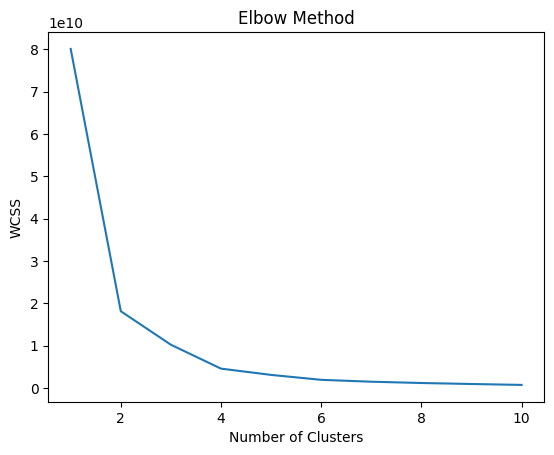

In [3]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


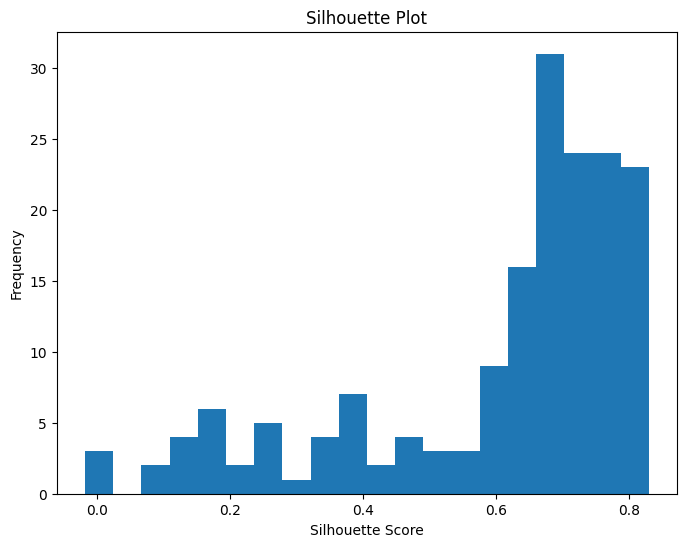

In [4]:
from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(X, cluster_labels)

plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20)
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.show()


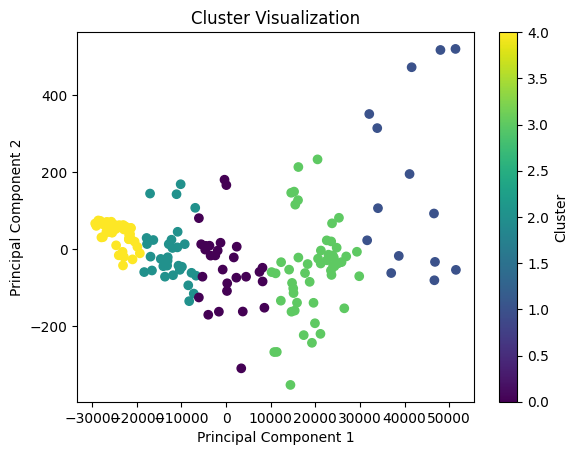

In [5]:
from sklearn.decomposition import PCA

# Load features from CSV file
df = pd.read_csv("features_with_labels.csv")

# Extract features for clustering
X = df.drop(columns=["Image Number","Complexity"]).values

# Perform KMeans clustering
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Plot the clusters in 2D
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()




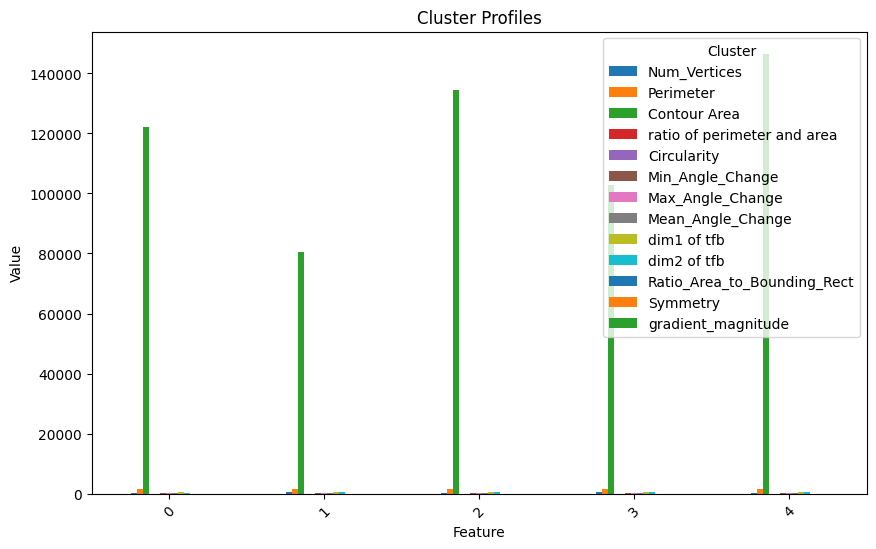

In [6]:
cluster_centers = kmeans.cluster_centers_
cluster_profiles = pd.DataFrame(cluster_centers, columns=df.columns[1:-1])
cluster_profiles.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()


Feature Order:
['Num_Vertices', 'Perimeter', 'Contour Area', 'ratio of perimeter and area', 'Circularity', 'Min_Angle_Change', 'Max_Angle_Change', 'Mean_Angle_Change', 'dim1 of tfb', 'dim2 of tfb', 'Ratio_Area_to_Bounding_Rect', 'Symmetry', 'gradient_magnitude']


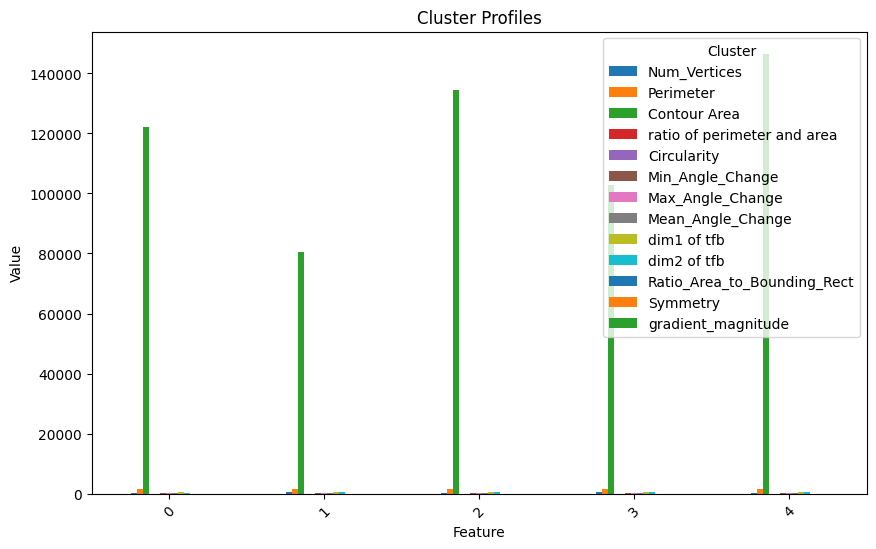


Average Values:
Num_Vertices                      283.045711
Perimeter                        1496.313470
Contour Area                   117334.388857
ratio of perimeter and area         0.013318
Circularity                         0.656918
Min_Angle_Change                   76.433036
Max_Angle_Change                  135.000000
Mean_Angle_Change                 132.788189
dim1 of tfb                       413.959510
dim2 of tfb                       365.615674
Ratio_Area_to_Bounding_Rect         0.771755
Symmetry                            7.342875
gradient_magnitude                  0.695635
dtype: float64


In [8]:
cluster_centers = kmeans.cluster_centers_
cluster_profiles = pd.DataFrame(cluster_centers, columns=df.columns[1:-1])

# Print the order of average values corresponding to each feature
print("Feature Order:")
print(cluster_profiles.columns.tolist())

# Plot the cluster profiles as bar plots
cluster_profiles.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

# Print the average values corresponding to each feature
print("\nAverage Values:")
print(cluster_profiles.mean())

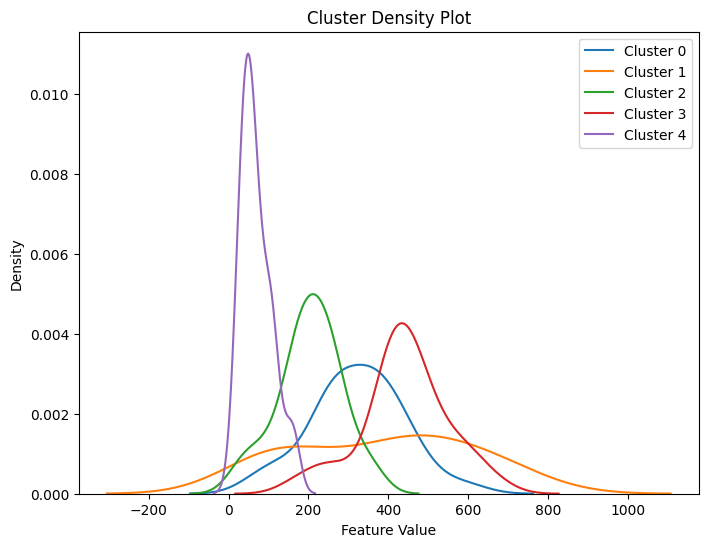

In [9]:
import seaborn as sns  # Import Seaborn module

# Plot the clusters density in 1D
plt.figure(figsize=(8, 6))  # Create one figure for all plots
for i in range(num_clusters):
    cluster_data = X[cluster_labels == i]
    sns.kdeplot(cluster_data[:, 0], label=f'Cluster {i}')  # Plot kernel density plot
plt.title('Cluster Density Plot')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend()
plt.show()




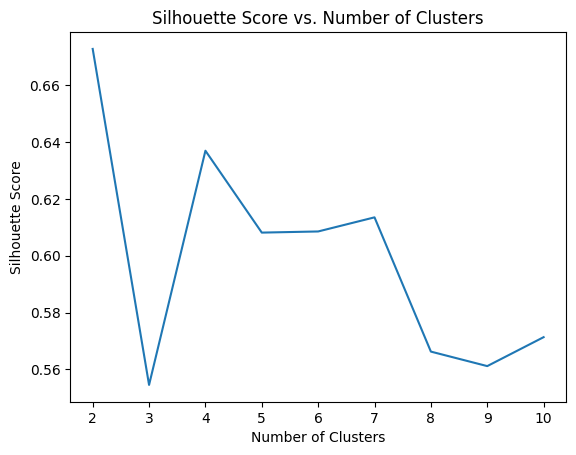

In [10]:
# Compute different validity indices for different numbers of clusters
# Plot the indices against the number of clusters
# Example: Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


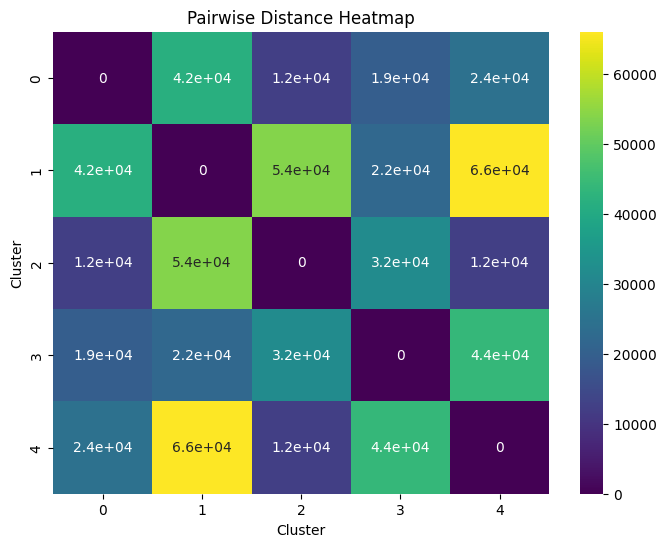

In [11]:
from sklearn.metrics import pairwise_distances

cluster_distances = pairwise_distances(cluster_centers)
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_distances, annot=True, cmap='viridis')
plt.title('Pairwise Distance Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.show()
